In [0]:
import os
import gzip
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import torchvision
import torch.nn as nn
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
train_data = torchvision.datasets.FashionMNIST(root= './MNIST',train=True,download=True,transform=torchvision.transforms.ToTensor())
test_data = torchvision.datasets.FashionMNIST(root= './MNIST',train=False,download=True,transform=torchvision.transforms.ToTensor())

0it [00:00, ?it/s]

26427392it [00:02, 10322550.35it/s]                             


Extracting ./MNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/FashionMNIST/raw


0it [00:00, ?it/s]

32768it [00:00, 72224.34it/s]                            
0it [00:00, ?it/s]

Extracting ./MNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/FashionMNIST/raw


4423680it [00:01, 3066661.98it/s]                            
0it [00:00, ?it/s]

Extracting ./MNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/FashionMNIST/raw


8192it [00:00, 25897.60it/s]            

Extracting ./MNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/FashionMNIST/raw
Processing...
Done!


In [0]:
bt_size = 128
train_load = torch.utils.data.DataLoader(dataset= train_data,batch_size=bt_size,shuffle= True)
test_load = torch.utils.data.DataLoader(dataset= test_data,batch_size=bt_size,shuffle= True)

In [0]:
epochs = 25
batch = 128
alpha = 0.001
temp1 = 0

In [0]:
class cnn_model(nn.Module):
    def __init__(self):
        super(cnn_model, self).__init__()
        self.layer1 = nn.Sequential(
            Conv2d(1, 16, kernel_size=5, padding=2),
            BatchNorm2d(16),
            ReLU(),
            MaxPool2d(2))
        self.layer2 = nn.Sequential(
            Conv2d(16, 32, kernel_size=5, padding=2),
            BatchNorm2d(32),
            ReLU(),
            MaxPool2d(2))
        self.fc= nn.Linear(7*7*32,10)
    def forward(self,x):
        global temp1
        out = self.layer1(x)
        out = self.layer2(out)
        temp1 = out.clone()
        out = out.view(out.size(0),-1)
        out = self.fc(out)
        return out

In [0]:
cnn = cnn_model()

In [0]:
cr = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(),lr= alpha)

In [9]:
losses = []
arr_l = []
test_l=[]
mat_train = np.zeros((10,1))
out_train = np.zeros((10,1))
for ep in range(epochs):
    l=0
    l1 = 0
    for i,(images,labels) in enumerate(train_load):
        images = Variable(images.float())
        labels = Variable(labels)
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = cr(outputs, labels)
        l+=loss.data
        loss.backward()
        optimizer.step()
        losses.append(loss.data)
        if (i+1)%bt_size==0:
            print('Epoch : %d/%d, Iter : %d/%d, Loss : %.4f'%(ep+1,epochs,i+1,len(train_data)//batch,loss.data))
    arr_l.append(l)
    for i,(images,labels) in enumerate(test_load):
        images = Variable(images.float())
        labels = Variable(labels)
        outputs = cnn(images)
        loss = cr(outputs, labels)
        l1+=loss.data
    test_l.append(l1)

Epoch : 1/25, Iter : 128/468, Loss : 0.4112
Epoch : 1/25, Iter : 256/468, Loss : 0.3131
Epoch : 1/25, Iter : 384/468, Loss : 0.2993
Epoch : 2/25, Iter : 128/468, Loss : 0.2423
Epoch : 2/25, Iter : 256/468, Loss : 0.1963
Epoch : 2/25, Iter : 384/468, Loss : 0.2058
Epoch : 3/25, Iter : 128/468, Loss : 0.2605
Epoch : 3/25, Iter : 256/468, Loss : 0.2201
Epoch : 3/25, Iter : 384/468, Loss : 0.3915
Epoch : 4/25, Iter : 128/468, Loss : 0.2248
Epoch : 4/25, Iter : 256/468, Loss : 0.2503
Epoch : 4/25, Iter : 384/468, Loss : 0.1918
Epoch : 5/25, Iter : 128/468, Loss : 0.1788
Epoch : 5/25, Iter : 256/468, Loss : 0.2603
Epoch : 5/25, Iter : 384/468, Loss : 0.2146
Epoch : 6/25, Iter : 128/468, Loss : 0.1691
Epoch : 6/25, Iter : 256/468, Loss : 0.1642
Epoch : 6/25, Iter : 384/468, Loss : 0.2341
Epoch : 7/25, Iter : 128/468, Loss : 0.1712
Epoch : 7/25, Iter : 256/468, Loss : 0.2444
Epoch : 7/25, Iter : 384/468, Loss : 0.1640
Epoch : 8/25, Iter : 128/468, Loss : 0.1476
Epoch : 8/25, Iter : 256/468, Lo

In [10]:
correct = 0
total = 0
pred_train = np.zeros((1,1))
lab_train = np.zeros((1,1))
for images, labels in train_load:
    images = Variable(images.float())
    outputs = cnn(images)
    _, predicted = torch.max(outputs.data, 1)
    pr = predicted.detach().numpy()
    lb = labels.detach().numpy()
    lab_train = np.vstack((lab_train,lb.reshape((-1,1))))
    pred_train = np.vstack((pred_train,pr.reshape((-1,1))))
    total += labels.size(0)
    correct += (predicted == labels).sum()
pred_train = pred_train[1:]
lab_train = lab_train[1:]
print('Train Accuracy of the model on the 0000 test images: %.4f ' % (float(correct) / float(total)))

Train Accuracy of the model on the 0000 test images: 0.9777 


In [11]:
cnn.eval()
correct = 0
total = 0
lab_test = np.zeros((1,1))
pred_test = np.zeros((1,1))
for images, labels in test_load:
    images = Variable(images.float())
    outputs = cnn(images)
    _, predicted = torch.max(outputs.data, 1)
    pr = predicted.detach().numpy()
    lb = labels.detach().numpy()
    lab_test = np.vstack((lab_test,lb.reshape((-1,1))))
    pred_test = np.vstack((pred_test,pr.reshape((-1,1))))
    total += labels.size(0)
    correct += (predicted == labels).sum()
pred_test = pred_test[1:]
lab_test = lab_test[1:]
print('Test Accuracy of the model on the 10000 test images: %.4f ' % (float(correct) / float(total)))

Test Accuracy of the model on the 10000 test images: 0.9043 


In [16]:
print(confusion_matrix(lab_train, pred_train))
print(confusion_matrix(lab_test, pred_test))

[[5720    1   15   28    2    0  234    0    0    0]
 [   0 5997    0    3    0    0    0    0    0    0]
 [  31    0 5612   17  101    0  239    0    0    0]
 [  16    1    4 5884   26    0   69    0    0    0]
 [   2    0   75   31 5632    0  260    0    0    0]
 [   0    0    0    0    0 5999    0    1    0    0]
 [  71    0   31   24   22    0 5852    0    0    0]
 [   0    0    0    0    0    0    0 5997    0    3]
 [   1    0    0    0    0    0    2    0 5997    0]
 [   0    0    0    0    0    1    0   28    0 5971]]
[[821   0  19  17   2   2 136   0   3   0]
 [  1 986   0   8   2   0   0   0   3   0]
 [ 15   0 817   8  54   0 104   0   2   0]
 [ 22   3  10 890  34   0  39   0   2   0]
 [  3   0  50  20 821   0 104   0   2   0]
 [  0   0   0   0   0 981   0  16   1   2]
 [ 89   1  37  22  40   0 807   0   4   0]
 [  0   0   0   0   0   6   0 979   0  15]
 [  2   0   0   5   4   2   5   2 979   1]
 [  0   0   0   0   0   9   1  28   0 962]]


In [0]:
dbfile = open('/content/gdrive/My Drive/ML/Assignment3/q2/cnn_pickle', 'ab')
pickle.dump(cnn, dbfile)                      
dbfile.close() 

SVM PART

In [0]:
mat_train = np.zeros((1,10))
out_train = np.zeros((1,1))
for i,(images,labels) in enumerate(train_load):
        images = Variable(images.float())
        labels = Variable(labels)
        outputs = cnn(images)
        t = outputs.tolist()
        t = np.array(t)
        for i in t:
            mat_train = np.vstack([mat_train,i])
        for i in labels:
            out_train = np.vstack([out_train,i])
mat_test = np.zeros((1,10))
out_test = np.zeros((1,1))
for i,(images,labels) in enumerate(test_load):
        images = Variable(images.float())
        labels = Variable(labels)
        outputs = cnn(images)
        t = outputs.tolist()
        t = np.array(t)
        for i in t:
            mat_test = np.vstack([mat_test,i])
        for i in labels:
            out_test = np.vstack([out_test,i])
mat_test = mat_test[1:]
mat_train = mat_train[1:]
out_train = out_train[1:]
out_test = out_test[1:]

In [19]:
out_train = out_train.ravel()
out_test = out_test.ravel()
print(mat_train.shape)
print(out_train.shape)
print(mat_test.shape)
print(out_test.shape)

(60000, 10)
(60000,)
(10000, 10)
(10000,)


In [20]:
print(len(test_load))

79


In [0]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [22]:
clf = SVC(kernel='rbf',gamma='scale',decision_function_shape='ovr')
clf.fit(mat_train,out_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
sc = clf.score(mat_test,out_test)
sc1 = clf.score(mat_train,out_train)
print(sc,sc1)

0.9106 0.9852166666666666


In [0]:
pred_test = clf.predict(mat_test)
pred_train = clf.predict(mat_train)

In [25]:
print(confusion_matrix(out_train, pred_train))
print(confusion_matrix(out_test, pred_test))

[[5848    0   26   27    3    0   95    0    1    0]
 [   0 6000    0    0    0    0    0    0    0    0]
 [  27    0 5829   16   78    0   50    0    0    0]
 [  14    2    5 5938   26    0   15    0    0    0]
 [   2    0   74   28 5842    0   54    0    0    0]
 [   0    0    0    0    0 5999    0    1    0    0]
 [ 131    0   89   43   56    0 5681    0    0    0]
 [   0    0    0    0    0    0    0 5994    0    6]
 [   0    0    0    0    0    0    1    1 5998    0]
 [   0    0    1    0    0    0    0   15    0 5984]]
[[860   0  22  15   2   0  95   0   6   0]
 [  0 985   2   7   2   0   0   0   4   0]
 [ 14   0 857   9  57   0  61   0   2   0]
 [ 21   3  11 904  32   0  28   0   1   0]
 [  3   0  56  21 866   0  52   0   2   0]
 [  0   0   0   0   0 986   0  11   0   3]
 [114   1  59  24  62   0 735   0   5   0]
 [  0   0   0   0   0  10   0 971   0  19]
 [  1   0   0   5   3   3   4   4 979   1]
 [  0   0   0   0   0   7   1  29   0 963]]


In [26]:
print(accuracy_score(out_train, pred_train))
print(accuracy_score(out_test, pred_test))

0.9852166666666666
0.9106


In [0]:
arr_loss = [float(i) for i in arr_l]

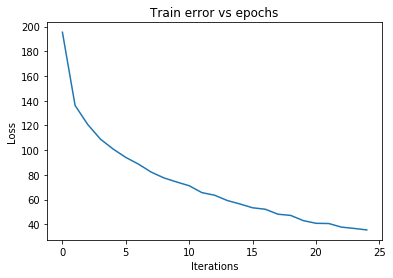

In [28]:
plt.plot(np.arange(epochs),arr_loss)
plt.title('Train error vs epochs')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

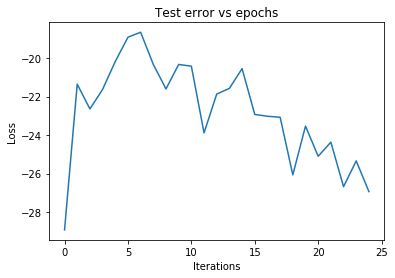

In [29]:
arr_loss = [1-float(i) for i in test_l]
plt.plot(np.arange(epochs),arr_loss)
plt.title('Test error vs epochs')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()